In [246]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [247]:
df = pd.read_csv(r'C:\Users\Madhu Khatri\Downloads\Water_Probability\water_potability.csv')

In [248]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [249]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [250]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [251]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [252]:
df.dtypes.tolist()

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64')]

In [253]:
 df.columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [254]:
missing_col = df.isnull().sum().sort_values(ascending = False)
print(missing_col)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64


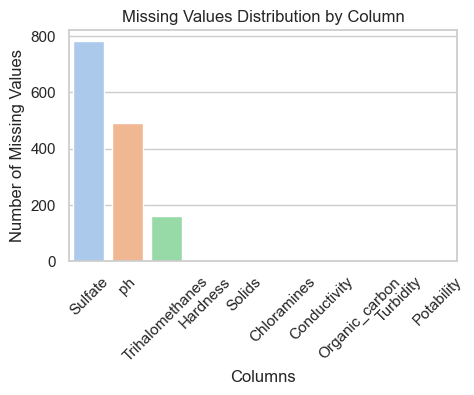

In [255]:
# Create a bar plot for missing values
plt.figure(figsize=(5, 3))
sns.barplot(x=missing_col.index, y=missing_col, palette='pastel')
plt.title('Missing Values Distribution by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()


In [256]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


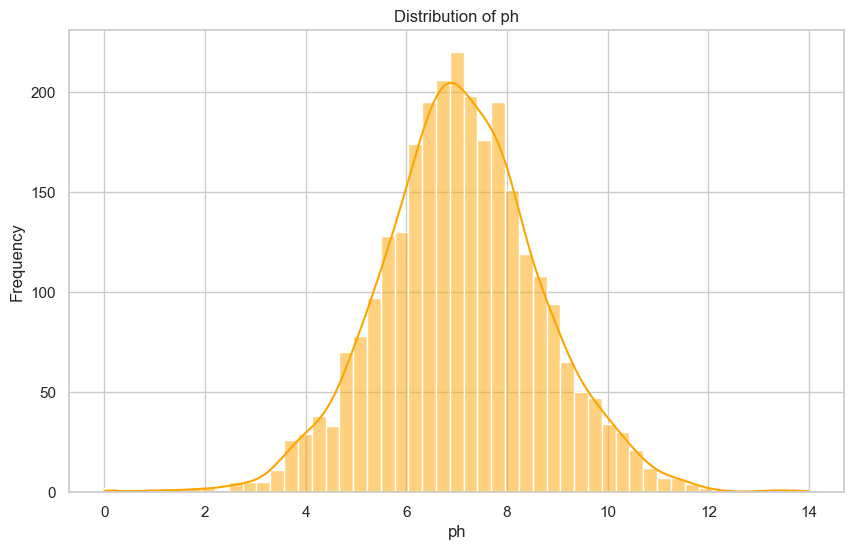

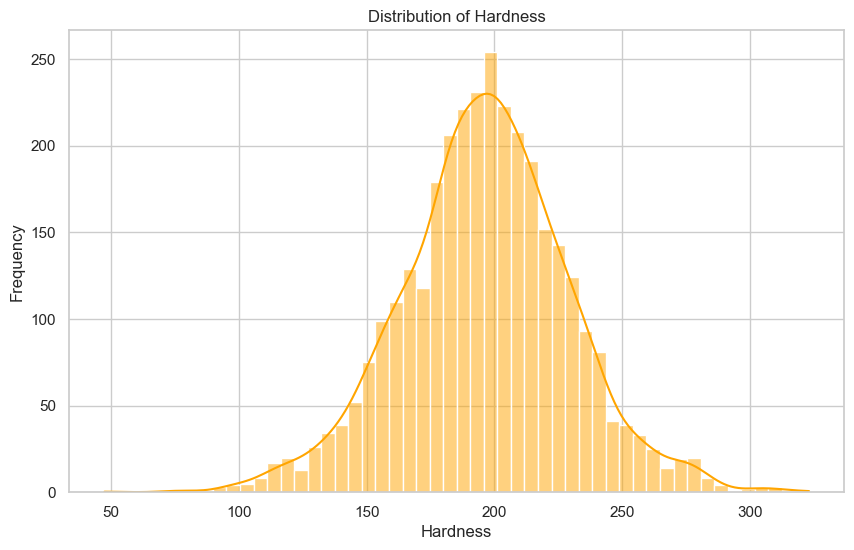

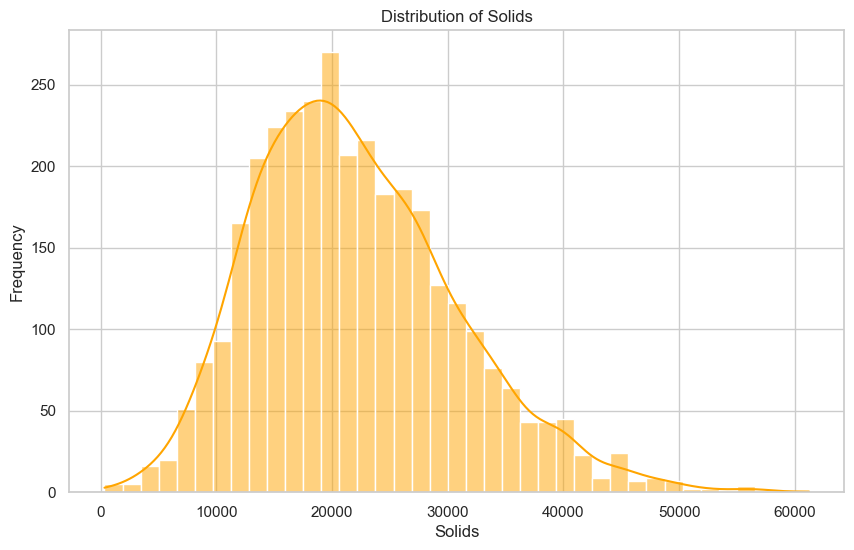

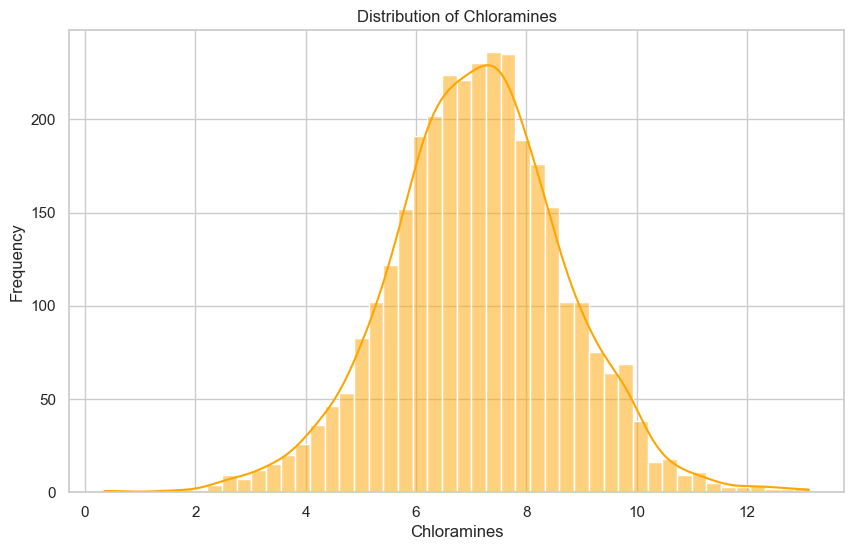

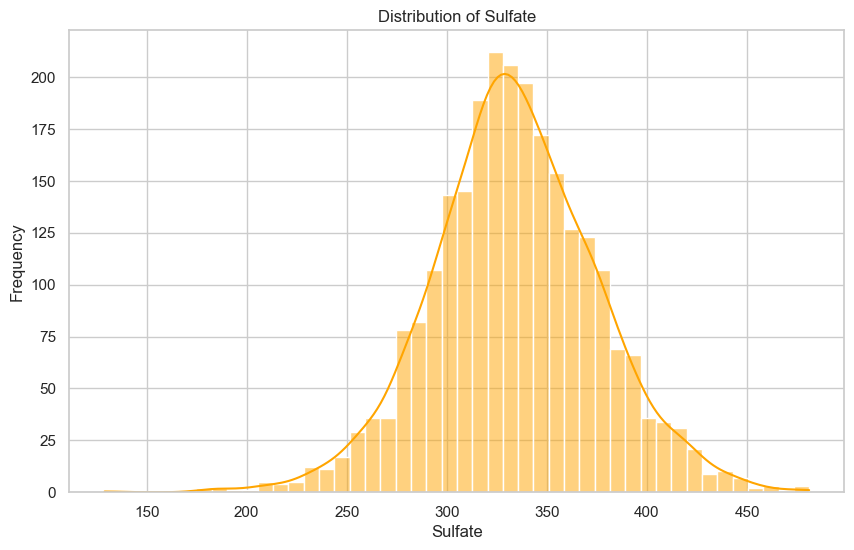

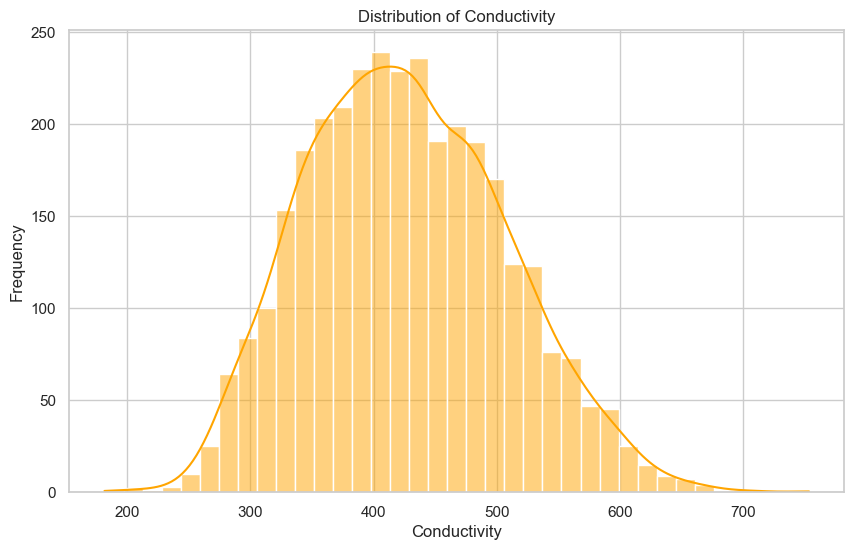

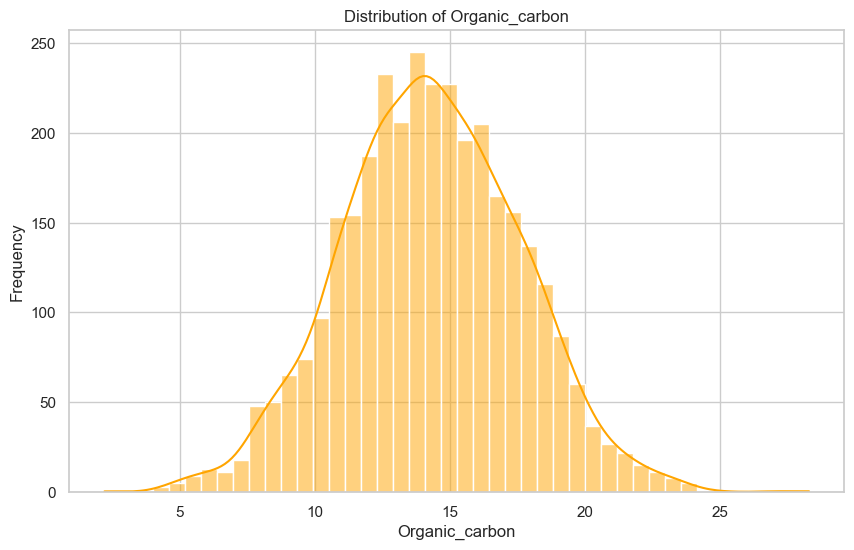

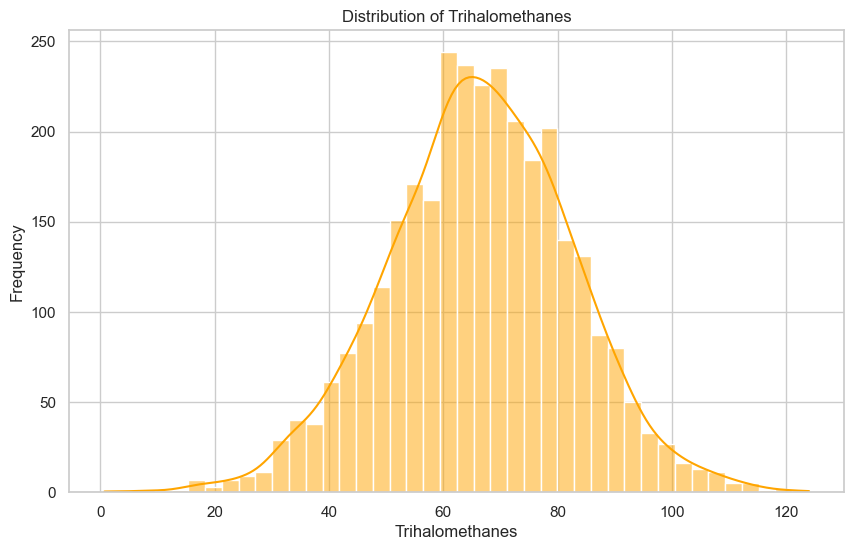

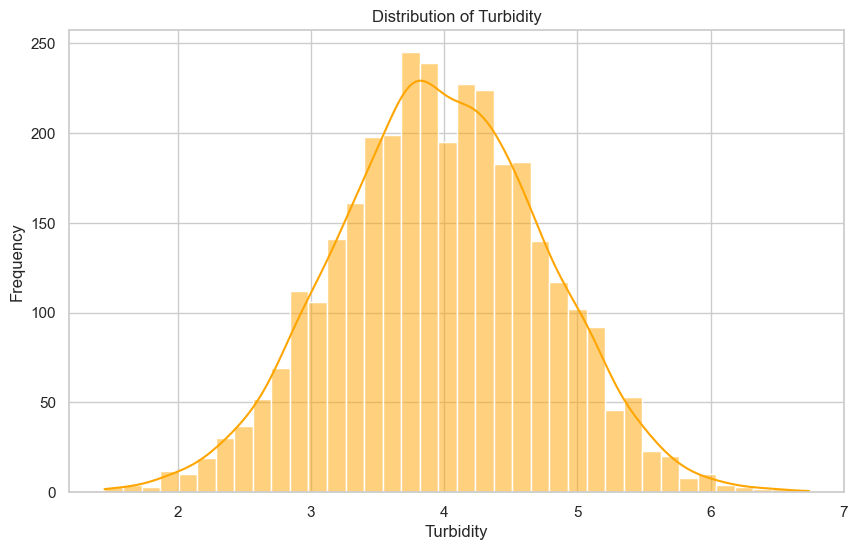

In [257]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

for column in df.columns:
    if df[column].dtype == 'float64':
        plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
        sns.histplot(df[column], kde=True, color='orange')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

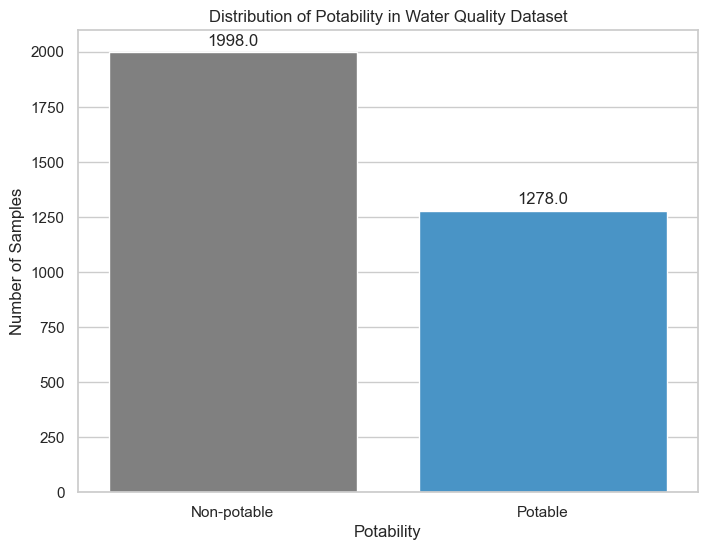

In [258]:

# Assuming df is your DataFrame and it's already loaded
# Here we recreate the potability distribution preparation:
potability_distribution = df['Potability'].value_counts().reset_index()
potability_distribution.columns = ['Potability', 'Count']
potability_distribution['Potability'] = potability_distribution['Potability'].map({0: 'Non-potable', 1: 'Potable'})

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
barplot = sns.barplot(x='Potability', y='Count', data=potability_distribution, palette=['gray', '#3498DB'])
plt.title('Distribution of Potability in Water Quality Dataset')
plt.xlabel('Potability')
plt.ylabel('Number of Samples')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0,8 ), 
                     textcoords = 'offset points'
                    )
plt.show()

Correlation between pH and Potability: -0.00


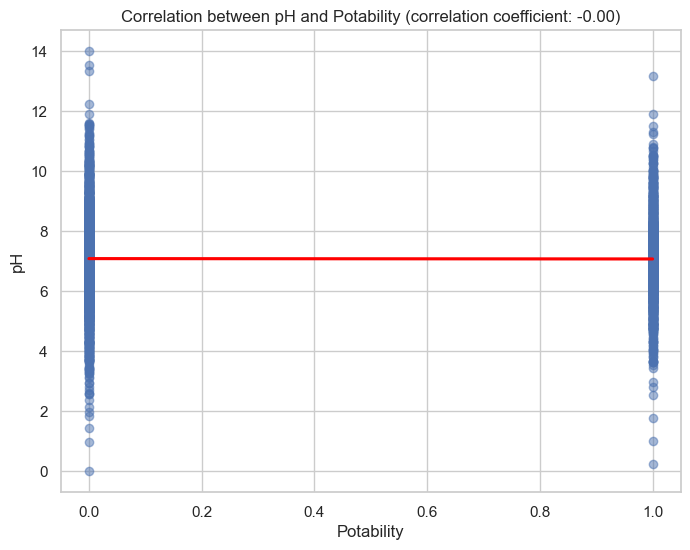

Correlation between Hardness and Potability: -0.01


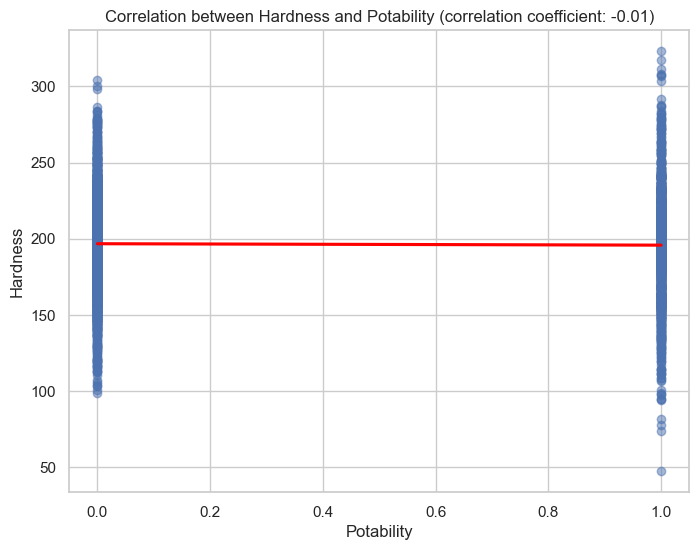

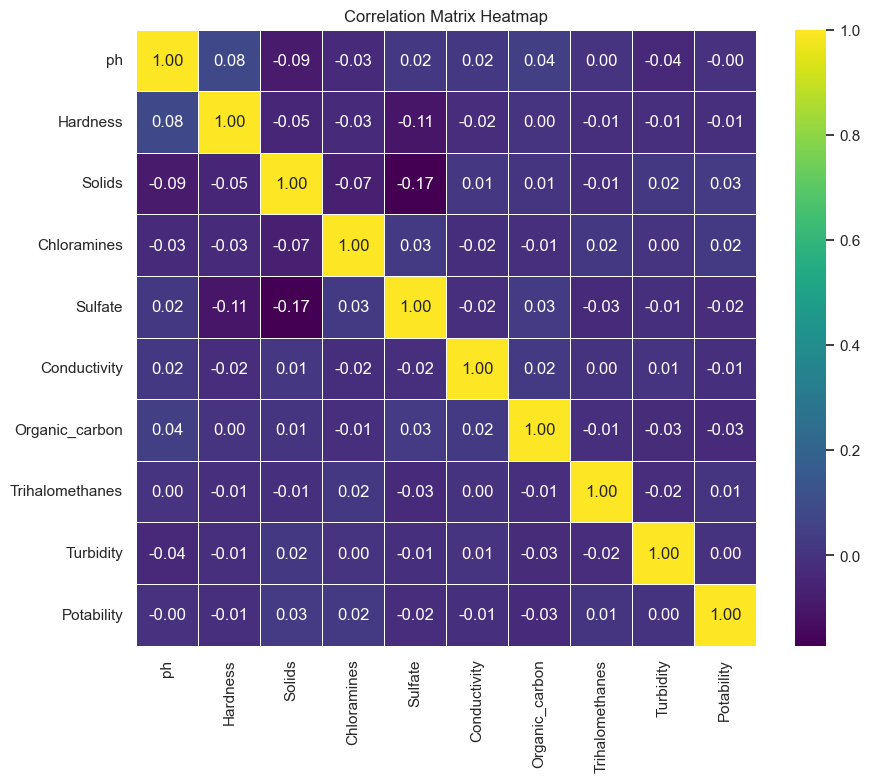

In [259]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between pH and Potability
correlation_ph = df['ph'].corr(df['Potability'])
print(f'Correlation between pH and Potability: {correlation_ph:.2f}')

# Scatter plot with regression line for pH and Potability
plt.figure(figsize=(8, 6))
sns.regplot(x='Potability', y='ph', data=df, ci=None, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'Correlation between pH and Potability (correlation coefficient: {correlation_ph:.2f})')
plt.xlabel('Potability')
plt.ylabel('pH')
plt.show()

# Calculate the correlation between Hardness and Potability
correlation_hardness = df['Hardness'].corr(df['Potability'])
print(f'Correlation between Hardness and Potability: {correlation_hardness:.2f}')

# Scatter plot with regression line for Hardness and Potability
plt.figure(figsize=(8, 6))
sns.regplot(x='Potability', y='Hardness', data=df, ci=None, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'Correlation between Hardness and Potability (correlation coefficient: {correlation_hardness:.2f})')
plt.xlabel('Potability')
plt.ylabel('Hardness')
plt.show()

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Function to create scatter plots based on selected features
def interactive_scatter(x_feature, y_feature):
    # Clear current figure to avoid overlay of plots
    plt.clf()
    
    # Create a new figure
    plt.figure(figsize=(8, 6))
    
    # Check if the columns exist and have the correct datatype
    if x_feature in df.columns and y_feature in df.columns:
        if df[x_feature].dtype == 'float64' and df[y_feature].dtype == 'float64':
            # Use Seaborn to create the scatter plot
            sns.scatterplot(x=df[x_feature], y=df[y_feature], color='orange')
            plt.title(f'{x_feature} vs {y_feature}')
            plt.xlabel(x_feature)
            plt.ylabel(y_feature)
            plt.show()
        else:
            print('Invalid Data Type')
    else:
        print('Feature Not Found')

# Dropdown widgets for feature selection
x_dropdown = widgets.Dropdown(options=df.columns, description='X Feature:')
y_dropdown = widgets.Dropdown(options=df.columns, description='Y Feature:')

# Display interactive widgets
widgets.interactive(interactive_scatter, x_feature=x_dropdown, y_feature=y_dropdown)

interactive(children=(Dropdown(description='X Feature:', options=('ph', 'Hardness', 'Solids', 'Chloramines', '…

Data split into train and test sets (80% train, 20% test).
Predictive modeling results for water potability prediction:
                      Model  Accuracy  Precision    Recall  F1 Score  \
0       Logistic Regression  0.628049   0.000000  0.000000  0.000000   
1  Random Forest Classifier  0.681402   0.637795  0.331967  0.436658   
2                       SVM  0.695122   0.696429  0.319672  0.438202   
3         Gradient Boosting  0.658537   0.596154  0.254098  0.356322   
4            Neural Network  0.679878   0.595506  0.434426  0.502370   

    ROC AUC         Confusion Matrix  
0  0.500000     [[412, 0], [244, 0]]  
1  0.610158   [[366, 46], [163, 81]]  
2  0.618574   [[378, 34], [166, 78]]  
3  0.576078   [[370, 42], [182, 62]]  
4  0.629834  [[340, 72], [138, 106]]  


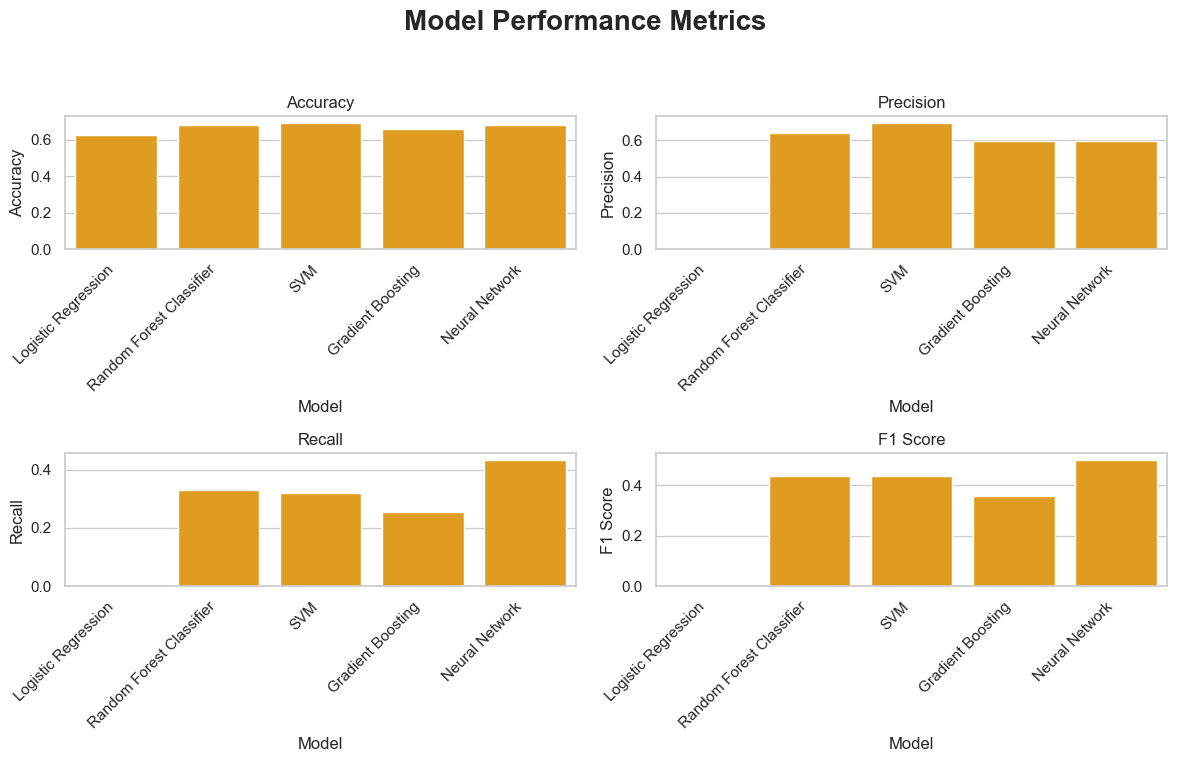

In [264]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and already loaded

# Impute missing values with the mean for each column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split data into features and target
X = df_imputed.drop(columns=['Potability'])
y = df_imputed['Potability']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into train and test sets (80% train, 20% test).")

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    })

results_df = pd.DataFrame(results)
print("Predictive modeling results for water potability prediction:")
print(results_df)

# Visualization
plt.figure(figsize=(12, 8))
plt.suptitle('Model Performance Metrics', fontsize=20, fontweight='bold')

# Plot accuracy, precision, recall, and F1 Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=results_df, color='orange')
    plt.title(metric)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()